<a href="https://colab.research.google.com/github/Aladdin60/Project-Silver-swift/blob/main/COLAB/gradient_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Gradient Boosting MAE: 20.241210481009546
Gradient Boosting MSE: 664.1828187182712
Gradient Boosting R-squared: -0.027164764475006375
     Actual Cash Flow  Predicted Cash Flow (Gradient Boosting)
521          4.642522                                 9.679214
737        -23.811609                                -3.361914
740          5.661871                                 6.208589
660        -24.201522                                 5.027891
411         17.319680                                -2.245452


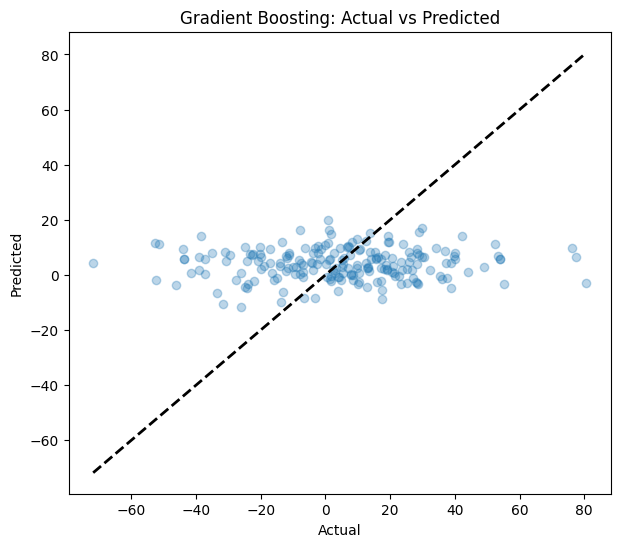

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint

# Load the data
data = pd.read_csv('/content/cash_flow_data_ final.csv')

# Define features and target
features = ['Revenue/Sales', 'Total Income', 'Tax', 'Net Profit', 'Accounts Receivable',
            'Accounts Payable', 'Total Expenditure', 'Interest', 'GDP Growth',
            'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure', 'Seasonality',
            'Client Payment Trends', 'EBIT']
target = 'Cash Flow'

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(3, 50, 3)),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
    'learning_rate': np.linspace(0.01, 0.3, num=30),
    'subsample': np.linspace(0.6, 1.0, num=10)
}

# Randomized Search
random_search = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Best parameters from the search
best_gbr = random_search.best_estimator_

# Train the best model
best_gbr.fit(X_train_scaled, y_train)
y_pred_gbr = best_gbr.predict(X_test_scaled)

# Evaluate the model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'Gradient Boosting MAE: {mae_gbr}')
print(f'Gradient Boosting MSE: {mse_gbr}')
print(f'Gradient Boosting R-squared: {r2_gbr}')

# Adding predicted cash flow values to the data
results_gbr = pd.DataFrame({
    'Actual Cash Flow': y_test,
    'Predicted Cash Flow (Gradient Boosting)': y_pred_gbr
})

# Display the first few rows of the predictions
print(results_gbr.head())

# Plotting
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()
